Processing ./dependent/No Spray.txt
Processing ./dependent/60.txt
Processing ./dependent/80.txt
Processing ./dependent/0.txt
Processing ./dependent/40.txt
Processing ./dependent/20.txt
Processing ./dependent/100.txt


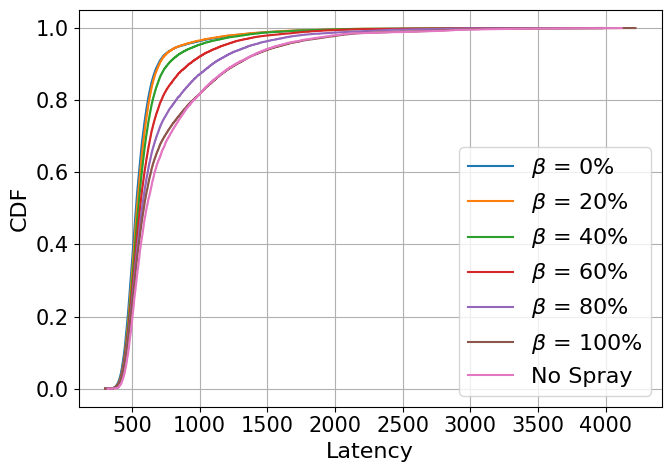

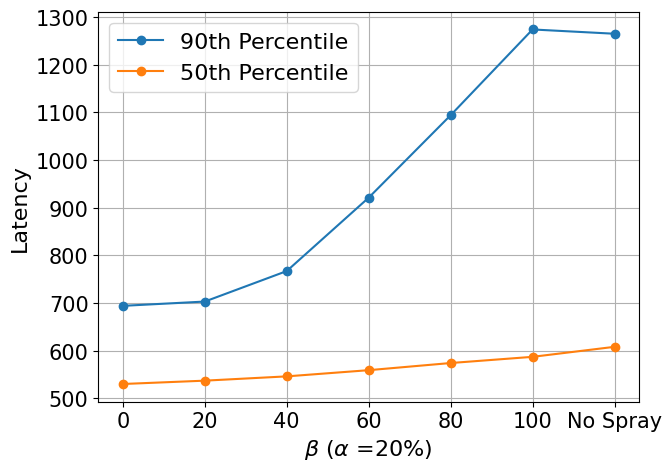

In [84]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os


plt.rcParams.update({
    'font.size': 16,           # Base font size
    'axes.titlesize': 16,      # Title font size
    'axes.labelsize': 16,      # x/y label size
    'xtick.labelsize': 15,     # Tick label size
    'ytick.labelsize': 15,
    'legend.fontsize': 11,
    'figure.titlesize': 18     # Overall figure title (if used)
})

def extract_latencies(filename):
    latencies = {}
    pattern = re.compile(r"stored (\d+) total max latency (\d+)")
    
    with open(filename, "r") as f:
        for line in f:
            match = pattern.search(line)
            if match:
                seq = int(match.group(1))
                lat = int(match.group(2))
                if latencies.get(seq) is None:
                    latencies[seq] = lat
                else:
                    latencies[seq] = max(lat, latencies.get(seq))
                #print(f"seq: {seq}, lat: {lat}, max: {latencies[seq]}")
                    
    
    return latencies

def plot_cdf(data_with_names):
    """
    data_with_names: dict of (filename, data_array)
    """
    plt.figure(figsize=(7, 5))

    for name, data in data_with_names:
        # rename the keys
        name = "$\\beta$ = "+name+"%" if name.isdigit() else name
        sorted_data = np.sort(data)
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        plt.plot(sorted_data, cdf, linestyle='-', label=name)
        

    plt.xlabel("Latency")
    plt.ylabel("CDF")
    plt.grid(True)
    # larger legend
    plt.legend(loc='lower right', fontsize='medium',)
    plt.tight_layout()
    plt.savefig("latency_cdf.pdf", format='pdf',)
    plt.show()

def plot_percentile(percentiles, data_with_names):

    """
    data_with_names: list of (filename, data_array)
    """
    plt.figure(figsize=(7, 5))
    x = range(len(data_with_names))
    labels = [name for name, _ in data_with_names]
    plt.xticks(ticks=x, labels=labels)

    for percentile in percentiles:
        data = [np.percentile(data, percentile) for _, data in data_with_names]

        plt.plot(x, data, marker='o', linestyle='-')
        plt.xlabel("$\\beta$ ($\\alpha$ =20%)")
        plt.ylabel(f"Latency")
    plt.grid(True)
    plt.legend([f"{percentile}th Percentile" for percentile in percentiles], loc='upper left', fontsize='medium')
    plt.tight_layout()
    plt.savefig(f"latency_percentile.pdf", format='pdf',)
    plt.show()

def main():
    # read all files in the current directory
    data = []
    for root, dirs, files in os.walk("./dependent"):
        for file in files:
            if file.endswith(".txt") and (not file.split(".")[0].isdigit() or int(file.split(".")[0]) % 20 == 0 or file.endswith("90.txt")):
                filename = os.path.join(root, file)
                print(f"Processing {filename}")
                latencies = extract_latencies(filename)
                if latencies:
                    data.append((file.split(".")[0],list(latencies.values())))
    # sort based on key, if not int, make it 999
    data = sorted(data, key=lambda x: int(x[0]) if x[0].isdigit() else 999)

    plot_cdf(data)
    plot_percentile([90, 50],data)

if __name__ == "__main__":
    main()


[  8.12182798 201.02005433  28.59695272 ...  93.94189111  56.4515061
  91.39317104]


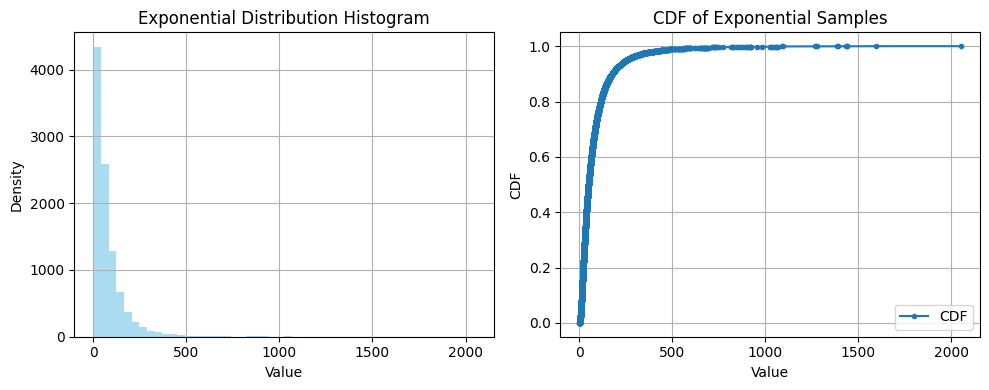

In [22]:
import re
import numpy as np
import matplotlib.pyplot as plt

expo_scale = np.log(50)
num_samples = 10000
expo_dist = np.random.lognormal(mean=expo_scale, sigma=1, size=num_samples)  
plt.figure(figsize=(10, 4))
print(expo_dist )
plt.subplot(1, 2, 1)
plt.hist(expo_dist, bins=50, alpha=0.7, color='skyblue')
plt.title("Exponential Distribution Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2)
sorted_data = np.sort(expo_dist)
cdf = np.arange(1, num_samples + 1) / num_samples
plt.plot(sorted_data, cdf, marker='.', linestyle='-', label="CDF")
plt.title("CDF of Exponential Samples")
plt.xlabel("Value")
plt.ylabel("CDF")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("exponential_distribution_plots.png")
plt.show()